# CDC Data Cleanup

In [1]:
import sys
# !{sys.executable} -m pip install faker
import pandas as pd
import numpy as np
from pathlib import Path
from sqlalchemy import inspect, create_engine

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data_file = Path("data/sadc_2019_national.dat")

"""
cols = ["sitecode", "sitename", "sitetyype", "siteTypenum", "year", "survyear", "weight", "statum", "PSU", "age", "sex",
"grade", "race4", "race7", "stheight", "stweight", "bmi", "bmipct", "qnobese", "qnowt", "Q66", "Q65", "sexid", "sexid2",
"sexpart", "sexpart2", "q8-q64", "qnfrcig", "qndaycig", "qnfrevp"]

"""
cols = range(0, 200)
df = pd.read_csv(data_file, header=0, delim_whitespace=True, engine='python', on_bad_lines='skip', names=cols, usecols=cols)

In [3]:
df.drop(columns=[0, 1, 2, 3, 4, 5], inplace=True)


In [4]:
df.head(2)

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,11111,11,22,111,1,1,122233231,6,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,2,2,1,.,2,.,.,.,.,.,.,.,1,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,1,1,2,2,.,.,.,2,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,None
1,1991,1,0.3201,11400,33,9423,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.41,3,1,12111,11,52,111,1,1,211111141,1,2,2,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,1,2,2,2,1,.,2,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,1,1,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.


In [5]:
df[199].value_counts()

.    153589
2     30101
1      7017
Name: 199, dtype: int64

In [6]:
# df.dtypes

In [7]:
cols = df.columns
for col in cols:
    if df[col].dtype == "object":
        df[col] = df[col].str.replace(".", "0")
        # df[col] = df[col].astype("float")
    else:
        pass

df.info

C:\Users\hoestreicher\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


<bound method DataFrame.info of          6    7       8      9       10       11  12  13  14  15  16    17     18       19     20  21   22  23  24  25   26   27     28     29       30   31       32   33         34         35          36         37     38    39    40  41    42  43   44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197   198   199
0       1991    1  0.5060  12310      29     3538   0   0   0   0   0     0      0       

In [11]:
# df = df.dropna()
df[6] = df[6].astype(int)
df.sort_values(by=[6])
display(df.head(2))# display(df[range(0, 20)].head(20))
display(df.tail(2))# display(df[range(0, 20)].tail(20))

,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1991,1,0.5060,12310,29,3538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11111,11,22,111,1,1,122233231,6,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,2,2,1,0,2,0,0,0,0,0,0,0,1,1,0,0,0,2,2,2,0,0,2,0,0,0,0,2,0,0,1,1,2,2,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,None
1,1991,1,0.3201,11400,33,9423,4,0,2,1,6,0,0,0,0,0,0,0,0,0,041,3,1,12111,11,52,111,1,1,211111141,1,2,2,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,2,2,2,1,0,2,0,0,0,0,0,0,0,2,1,0,0,0,2,2,2,0,0,2,0,0,0,0,2,0,0,2,2,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,02,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
217337,2019,15,1.7753,112,343678,2258522,7,1,3,0,0,1068,55079,1907669,27056,2,2,0,0,0,0,111,111,1,12,222,11,11,11,111111,1,122111111,0,2,0,0,0,2,2,2,0,0,2,0,0,0,0,2,0,2,2,2,0,0,0,2,2,0,0,0,0,2,2,0,0,2,2,0,0,2,2,2,2,2,2,0,2,0,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,None
217338,2019,15,4.7401,112,343678,2258523,7,1,4,2,3,1065,52016,1901589,19047,2,21,1,1,0,0,111,1111,1,122122,11,21111,111,111111,111,1221111112,2521141,86173,12,1232,0,2,0,0,0,2,2,2,2,0,2,0,0,0,0,2,2,1,2,2,0,0,0,2,2,0,2,2,0,2,2,0,2,2,2,0,0,2,2,2,2,2,2,0,2,2,2,0,2,2,2,2,2,2,0,0,0,2,0,2,2,2,1,1,2,1,0,2,1,2,1,1,0,2,2,0,1,2,2,1,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2,1,1,2,1,2,2,2,2,0,0,1,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Create a new dataframe while identifying columns
renamed_df = df.rename(columns={
    6: "year",
    7: "survyear",
    8: "weight", 
    9: "stratum",
    10: "PSU",
    11: "UNKN1",
    12: "age_code",
    13: "sex",
    14: "grade",
    15: "race4",
    16: "race7",
    17: "stheight",
    18: "stweight",
    19: "bmi",
    20: "bmipct",
    21: "qnobese",
    22: "qnowt"
})
renamed_df = renamed_df.sort_values(by=["year", "PSU"])
renamed_df

,year,survyear,weight,stratum,PSU,UNKN1,age_code,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
68,1991,1,0.9122,11210,1,150747,3,2,1,2,3,0,0,0,0,0,0,0,0,0,053,3,22112,11,41,111,1,1,123333832,6,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,2,2,2,0,2,0,0,0,0,0,0,0,1,2,0,0,0,2,2,2,0,0,2,0,0,0,0,2,0,0,1,1,2,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,None
69,1991,1,0.9122,11210,1,150748,3,2,1,2,3,0,0,0,0,0,0,0,0,0,011,1,4,2,11,1,111,1,1,211111131,6,1,2,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,2,2,0,0,2,0,0,0,0,2,0,0,2,2,2,2,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,02,1,3,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
70,1991,1,0.6244,11210,1,150749,3,2,1,4,2,0,0,0,0,0,0,0,0,0,051,1,1,22112,11,11,111,1,1,211111112,6,2,2,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,2,2,2,2,2,0,2,0,0,0,0,0,0,0,2,2,0,0,0,2,2,2,0,0,2,0,0,0,0,2,0,0,2,2,2,2,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,01,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
72,1991,1,0.5872,11210,1,150751,3,2,1,3,4,0,0,0,0,0,0,0,0,0,021,2,1,22112,11,11,111,1,1,211111112,6,1,2,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,2,2,2,2,2,0,2,0,0,0,0,0,0,0,2,2,0,0,0,2,2,2,0,0,2,0,0,0,0,2,0,0,2,2,2,2,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,02,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
74,1991,1,1.9266,11210,1,150753,3,2,1,2,3,0,0,0,0,0,0,0,0,0,015,5,3,11111,11,51,353,1,1,127622434,6,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2,2,1,0,2,0,0,0,0,0,0,0,2,2,0,0,0,1,2,1,0,0,2,0,0,0,0,2,0,0,1,1,1,1,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,02,1,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216808,2019,15,0.4813,201,787890,2257993,7,1,4,1,6,1060,52016,2003750,36005,2,213,1,1,2,25122,11,12,221122211211,21,11172,4,111,1,11,21723,36,3,8622,1,1261,2,2,2,2,0,0,0,2,2,0,2,2,0,2,2,1,1,2,2,2,2,2,2,2,2,0,2,2,0,2,2,0,2,1,0,2,0,2,2,2,0,2,0,0,2,2,0,0,0,2,1,2,2,1,0,2,2,0,0,0,2,0,0,0,0,0,0,2,1,2,2,0,0,2,0,0,1,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2

In [44]:
# renamed_df["year"] = renamed_df["year"].astype("string")
renamed_df["year"].value_counts()

2009    16410
1993    16296
1997    16262
2015    15624
2011    15425
1999    15349
2003    15214
2017    14765
2007    14041
2005    13917
2019    13677
2001    13601
2013    13583
1991    12271
1995    10904
Name: year, dtype: int64

In [45]:
# NEED to fix datatypes first
renamed_df["race7"].value_counts()

6    90500
4    57717
3    46403
2     7670
7     6144
0     5179
1     2411
5     1315
Name: race7, dtype: int64

In [46]:
# Save to local SQL db
# renamed_db = engine # etc

## Data Split
Now we'll split the data into PSU and Survey Questionaires to maximize flexibility in our analysis.


In [48]:
psu_df = renamed_df[["year", "survyear", "PSU", "weight", "stratum",  "UNKN1", "age_code", "sex", "grade", "race4", "race7", "stheight", "stweight", "bmi", "bmipct", "qnobese", "qnowt"]].copy()
psu_df

,year,survyear,PSU,weight,stratum,UNKN1,age_code,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
68,1991,1,1,0.9122,11210,150747,3,2,1,2,3,0,0,0,0,0,0
69,1991,1,1,0.9122,11210,150748,3,2,1,2,3,0,0,0,0,0,0
70,1991,1,1,0.6244,11210,150749,3,2,1,4,2,0,0,0,0,0,0
72,1991,1,1,0.5872,11210,150751,3,2,1,3,4,0,0,0,0,0,0
74,1991,1,1,1.9266,11210,150753,3,2,1,2,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216808,2019,15,787890,0.4813,201,2257993,7,1,4,1,6,1060,52016,2003750,36005,2,213
216809,2019,15,787890,0.4813,201,2257994,7,1,4,1,6,1073,68004,2207338,64073,2,213
217041,2019,15,787890,1.2238,201,2258226,7,1,1,4,2,1060,95026,3702109,98023,1,221
217043,2019,15,787890,3.6571,201,2258228,7,1,4,1,6,1068,83001,2904111,93055,2,113


In [49]:
psu_df["year"].dtypes

dtype('int32')

In [57]:
my_2019_df = psu_df.loc[psu_df["year"] == 2019]
my_2019_df.shape

(13677, 17)

In [58]:
my_2017_df = psu_df.loc[psu_df["year"] == 2017]
my_2017_df.shape

(14765, 17)

In [59]:
my_2015_df = psu_df.loc[psu_df["year"] == 2015]
my_2015_df.shape

(15624, 17)

In [60]:
my_2013_df = psu_df.loc[psu_df["year"] == 2013]
my_2013_df.shape

(13583, 17)

<AxesSubplot:>

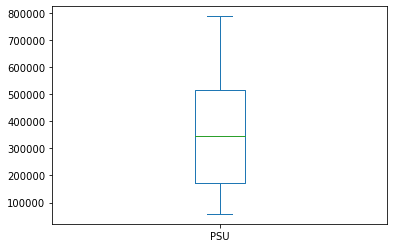

In [70]:
my_2019_df.plot.box(x="weight", y="PSU")

In [22]:
psu_df["race7"].value_counts()

6    90500
4    57717
3    46403
2     7670
7     6144
0     5179
1     2411
5     1315
Name: race7, dtype: int64

<AxesSubplot:xlabel='year'>

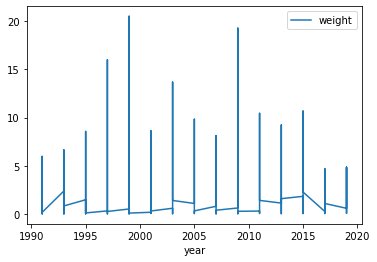

In [18]:
# Now decode the categorical data fro visualizations
race7_dict = {
    "0": "None",
    "1": "American Indian/Alaska Native",
    "2": "Asian",
    "3": "Black or African American",
    "4": "Hispanic/Latino",
    "5": "Native Hawaiian/Other Pacific Islander",
    "6": "White",
    "7": "Multiple Races (Non-Hispanic)",
}


psu_df.plot(x="year", y=["weight"])

In [18]:
df_12th_graders = psu_df.loc[psu_df['grade'] == 4.0].copy()
df_12th_graders.head()

,year,survyear,weight,stratum,PSU,UNKN1,age_code,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
5,1991,1,0.0344,19007,147,20321,0.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1708,1991,1,0.3466,12300,9,696593,5.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1822,1991,1,0.8005,12100,8,696707,5.0,2.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1847,1991,1,0.3652,12300,9,696732,5.0,2.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1897,1991,1,0.6883,11410,20,696782,5.0,2.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_12th_graders = df_12th_graders.sort_values(by=["year"])
df_12th_graders

,year,survyear,weight,stratum,PSU,UNKN1,age_code,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
5,1991,1,0.0344,19007,147,20321,0.0,2.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
10923,1991,1,0.9377,19004,116,2116166,6.0,1.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10924,1991,1,0.9377,19004,116,2116167,6.0,1.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10926,1991,1,0.8202,19004,116,2116169,6.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
10927,1991,1,0.9377,19004,116,2116170,6.0,1.0,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209884,2019,15,0.2302,102,343880,1112457,7.0,2.0,4.0,0.0,0.0,1078.0,71022.0,2204782.0,53097.0,2.0,21.0
209885,2019,15,0.2302,102,343880,1112458,7.0,2.0,4.0,1.0,6.0,1063.0,52016.0,1906319.0,15002.0,2.0,21.0
209886,2019,15,0.2302,102,343880,1112459,7.0,2.0,4.0,1.0,6.0,1085.0,79038.0,2301936.0,62071.0,2.0,21.0
215428,2019,15,0.1978,102,343880,2141631,6.0,1.0,4.0,1.0,6.0,1063.0,54043.0,2004863.0,41098.0,2.0,21.0


<AxesSubplot:xlabel='year'>

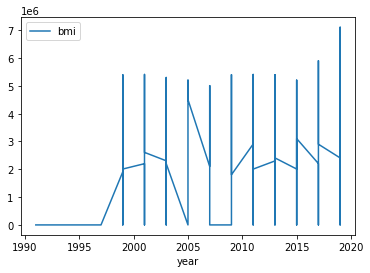

In [35]:
df_12th_graders.plot(x="year", y=["bmi"])


In [24]:
"""
How old are you?
A. 12 years old or younger
B. 13 years old
C. 14 years old
D. 15 years old
E. 16 years old
F. 17 years old
G. 18 years old or older
"""
# df["age_code"] = df[12]
# df["age_code"].value_counts()

6    55482
5    55447
4    49384
7    34287
3    21367
.      710
1      403
2      259
Name: age_code, dtype: int64

In [25]:
"""
What is your sex?
A. Female
B. Male
"""

# df["sex"] = df[13] #.value_counts()
# df["sex"].value_counts()

1    109540
2    106891
.       908
Name: sex, dtype: int64

In [26]:
"""
In what grade are you?
A. 9th grade
B. 10th grade
C. 11th grade
D. 12th grade
E. Ungraded or other grade
"""
# df["grade"] = df[14]
# df["grade"].value_counts()

3    54324
4    54109
1    53986
2    53604
.     1316
Name: grade, dtype: int64

In [27]:
"""
4-level variable from race and ethnicity questions:

1 = “White”
2 = “Black or African American”
3 = “Hispanic/Latino”
4 = “All Other Races”
"""
# df["race4"] = df[15]
# df["race4"].value_counts()

1    90500
3    57717
2    46403
4    19433
.     3286
Name: race4, dtype: int64

In [58]:
"""
7-level variable from race and ethnicity questions:
1 = “American Indian/Alaska Native”
2 = “Asian”
3 = “Black or African American”
4 = “Hispanic/Latino”
5 = “Native Hawaiian/Other Pacific Islander”
6 = “White”
7 = “Multiple Races (Non-Hispanic)”
"""
# df["race7"] = df[16]
# df["race7"].value_counts()

'\n7-level variable from race and ethnicity questions:\n1 = “American Indian/Alaska Native”\n2 = “Asian”\n3 = “Black or African American”\n4 = “Hispanic/Latino”\n5 = “Native Hawaiian/Other Pacific Islander”\n6 = “White”\n7 = “Multiple Races (Non-Hispanic)”\n'

In [59]:
# # how tall are you without shoes?
# df["stheight"] = df[17]
# df["stheight"].value_counts()

In [60]:
# how much do you weight without shoes?
# df["stweight"] = df[18]
# df["stweight"].head()

In [61]:
# Body mass index (BMI)
# df["bmi"] = df[19]
# df["bmi"].value_counts()

In [62]:
# Student’s BMI percentile
# df["bmipct"] = df[20]
# df["bmipct"].value_counts()

In [63]:
# Obesity indicator
# df["qnobese"] = df[21]
# df["qnobese"].value_counts()

In [64]:
# Overweight indicator
# df["qnowt"] = df[22]
# df["qnowt"].value_counts()

In [51]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,sex,age_code,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
0,XX,United,States,(XX),National,3,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,11111,11,22,111,1,1,122233231,6,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,2,2,1,.,2,.,.,.,.,.,.,.,1,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,1,1,2,2,.,.,.,2,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,None,.,.,.,.,.,.,.,.,.,.,.
1,XX,United,States,(XX),National,3,1991,1,0.3201,11400,33,9423,4,.,2,1,6,.,.,.,.,.,.,.,.,.,.41,3,1,12111,11,52,111,1,1,211111141,1,2,2,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,1,2,2,2,1,.,2,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,1,1,4,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,4,2,1,6,.,.,.,.,.,.
2,XX,United,States,(XX),National,3,1991,1,0.7787,11200,21,11716,5,.,2,1,6,.,.,.,.,.,.,.,.,.,.45,5,3,22111,76,57,734,2,1,41,6,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,2,2,1,.,1,1,.,.,.,.,.,.,2,1,.,.,.,1,1,1,.,.,1,.,.,.,.,2,.,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.2,1,3,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,5,2,1,6,.,.,.,.,.,.
3,XX,United,States,(XX),National,3,1991,1,1.3896,12100,8,13693,6,.,.,4,.,.,.,.,.,.,.,.,.,.,.15,5,8,1,77,27,726,6,6,127823852,1,1,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,1,.,1,1,.,.,.,.,.,.,1,1,.,.,.,1,1,1,.,.,1,.,.,.,.,1,.,.,1,1,1,1,1,2,2,1,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,1,1,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.2,6,2,1,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,6,.,4,.,.,.,.,.,.,.
4,XX,United,States,(XX),National,3,1991,1,0.1250,19006,143,20320,.,2,4,3,4,.,.,.,.,.,.,.,.,.,.32,2,2,22111,63,111,1,1,211111133,1,2,1,.,.,1,.,.,.,.,1,.,.,.,.,.,.,.,.,2,2,2,2,1,.,.,.,.,.,.,.,.,.,2,1,.,.,.,2,2,2,.,.,2,.,.,.,.,2,.,.,2,2,2,2,.,.,.,2,2,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.1,1,1,4,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,2,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1,.,.,.,.,.,.,.,.,None,2,.,4,3,4,.,.,.,.,.,.


In [54]:
cols = ["year", "sur_year", "weight", "stratum", "PSU", "UNKN1", "sex", "age_code", "grade", "race4", "race7", "stheight", "stweight", "bmi", "bmipct", "qnobese", "qnowt"]

new_df = df[cols].copy()
new_df.head()

,year,sur_year,weight,stratum,PSU,UNKN1,sex,age_code,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt
0,1991,1,0.5060,12310,29,3538,.,.,.,.,.,.,.,.,.,.,.
1,1991,1,0.3201,11400,33,9423,.,4,2,1,6,.,.,.,.,.,.
2,1991,1,0.7787,11200,21,11716,.,5,2,1,6,.,.,.,.,.,.
3,1991,1,1.3896,12100,8,13693,.,6,.,4,.,.,.,.,.,.,.
4,1991,1,0.1250,19006,143,20320,2,.,4,3,4,.,.,.,.,.,.


In [55]:
new_df["year"].value_counts()

2009    16410
1993    16296
1997    16262
2015    15624
2011    15425
1999    15349
2003    15214
2017    14765
2007    14041
2005    13917
2019    13677
2001    13601
2013    13583
1991    12271
1995    10904
Name: year, dtype: int64

In [9]:
new_df = df[[6, 8, 9, 10, 11]].copy()
new_df.rename(columns={6: "year", 8: "weight", 9: "stratum", 10: "PSU", 11: "age"}, inplace=True)
display(new_df.head())
display(new_df.tail())

,year,weight,stratum,PSU,age
0,1991,0.5060,12310,29,3538
1,1991,0.3201,11400,33,9423
2,1991,0.7787,11200,21,11716
3,1991,1.3896,12100,8,13693
4,1991,0.1250,19006,143,20320


,year,weight,stratum,PSU,age
217334,2019,1.1045,201,330220,2258519
217335,2019,1.1045,201,330220,2258520
217336,2019,1.1045,201,330220,2258521
217337,2019,1.7753,112,343678,2258522
217338,2019,4.7401,112,343678,2258523


<AxesSubplot:xlabel='year'>

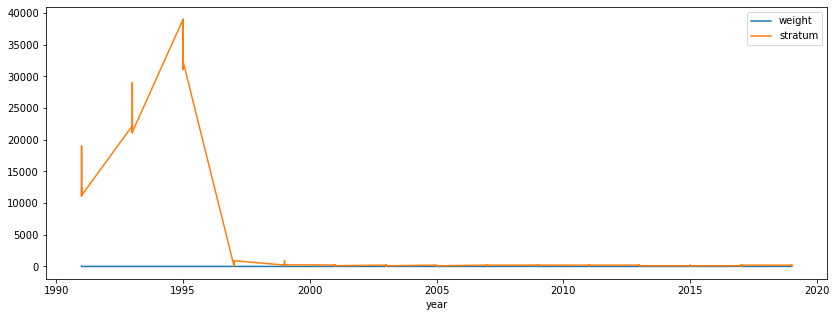

In [21]:
new_df.plot(x='year', y=['weight', 'stratum'], figsize=(14,5))